#**-------------------------------------TRABALHO PST---------------------------------------**

## **NOTEBOOK 3 | Statistical Models - AutoETS**

**Realizado por:**
- David Carvalho, nº2242131
- Lígia Carteado Mena, nº2242194
- Rui Filipe Parada, nº2211025

---------------------------------------------------------
**Dataset escolhido:**
- Foods1_CA4 -> Departamento Foods1 da loja 4 do Estado da Califórnia

## **1. IMPORTS**

In [ ]:
!pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 7.1 MB/s eta 0:00:00


In [ ]:
import io
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import metrics

from statsforecast.models import AutoETS
from statsforecast import StatsForecast

## **2. DATA UPLOAD | DIVISÃO TREINO E TESTE**

### Data upload: fazer upload dos ficheiros 'Foods1_CA4.csv' e 'results_PST2'

In [ ]:
uploaded = files.upload()

if 'Foods1_CA4.csv' in uploaded and 'results_PST2.csv' in uploaded:
    df = pd.read_csv(io.BytesIO(uploaded['Foods1_CA4.csv']), parse_dates=['ds'])
    Models_results = pd.read_csv(io.BytesIO(uploaded['results_PST2.csv']), sep=',')
    print("Both files uploaded successfully.")
else:
    print("Please ensure both 'Foods1_CA4.csv' and 'results_PST2.csv' are uploaded.")

df

Saving results_PST2.csv to results_PST2.csv
Saving Foods1_CA4.csv to Foods1_CA4.csv
Both files uploaded successfully.


,unique_id,ds,y
0,FOODS_1_001_CA_4,2011-01-30,1.0
1,FOODS_1_001_CA_4,2011-01-31,1.0
2,FOODS_1_001_CA_4,2011-02-01,1.0
3,FOODS_1_001_CA_4,2011-02-02,1.0
4,FOODS_1_001_CA_4,2011-02-03,1.0
...,...,...,...
355368,FOODS_1_219_CA_4,2016-06-15,2.0
355369,FOODS_1_219_CA_4,2016-06-16,1.0
355370,FOODS_1_219_CA_4,2016-06-17,4.0
355371,FOODS_1_219_CA_4,2016-06-18,0.0


### Conjunto de treino e teste

In [ ]:
train = df[df['ds'] <= '2016-05-22']
train

,unique_id,ds,y
0,FOODS_1_001_CA_4,2011-01-30,1.0
1,FOODS_1_001_CA_4,2011-01-31,1.0
2,FOODS_1_001_CA_4,2011-02-01,1.0
3,FOODS_1_001_CA_4,2011-02-02,1.0
4,FOODS_1_001_CA_4,2011-02-03,1.0
...,...,...,...
355340,FOODS_1_219_CA_4,2016-05-18,3.0
355341,FOODS_1_219_CA_4,2016-05-19,2.0
355342,FOODS_1_219_CA_4,2016-05-20,2.0
355343,FOODS_1_219_CA_4,2016-05-21,6.0


In [ ]:
test = df[df['ds'] > '2016-05-22'].rename(columns={'y': 'y_test'})
test

,unique_id,ds,y_test
1940,FOODS_1_001_CA_4,2016-05-23,2.0
1941,FOODS_1_001_CA_4,2016-05-24,0.0
1942,FOODS_1_001_CA_4,2016-05-25,0.0
1943,FOODS_1_001_CA_4,2016-05-26,6.0
1944,FOODS_1_001_CA_4,2016-05-27,0.0
...,...,...,...
355368,FOODS_1_219_CA_4,2016-06-15,2.0
355369,FOODS_1_219_CA_4,2016-06-16,1.0
355370,FOODS_1_219_CA_4,2016-06-17,4.0
355371,FOODS_1_219_CA_4,2016-06-18,0.0


In [ ]:
train.shape, test.shape

((349325, 3), (6048, 3))

## **3. MODELING**

### Dataset parameters

In [ ]:
freq = 'D'
season_length = 7
horizon = 28

### Instanciar modelos

Vai definir-se um modelo de previsão baseado em ETS (Erro, Tendência e Sazonalidade) de forma automática (Auto)

In [ ]:
models=[AutoETS(model=["A","Z","N"], alias="AutoETS", season_length=season_length)]

In [ ]:
sf = StatsForecast(
    models=models,
    freq=freq,
)

In [ ]:
sf.fit(train)

StatsForecast(models=[AutoETS])

In [ ]:
fit_dict = sf.fitted_[0, 0].model_
fit_dict

{'loglik': -6699.187505276746,
 'aic': 13404.375010553493,
 'bic': np.float64(13421.086340309665),
 'aicc': 13404.387407247708,
 'mse': np.float64(0.5147549171400158),
 'amse': np.float64(0.515276301696629),
 'fit': results(x=array([0.02782844, 0.63610682]), fn=13398.375010553493, nit=28, simplex=array([[0.02809487, 0.64381438],
        [0.02780731, 0.64494711],
        [0.02782844, 0.63610682]])),
 'residuals': array([ 0.36389318,  0.3537666 ,  0.34392183, ..., -0.29209991,
        -0.28397122, -0.27606875]),
 'components': 'ANNN',
 'm': 1,
 'nstate': 1,
 'fitted': array([0.63610682, 0.6462334 , 0.65607817, ..., 0.29209991, 0.28397122,
        0.27606875]),
 'states': array([[0.63610682],
        [0.6462334 ],
        [0.65607817],
        ...,
        [0.28397122],
        [0.27606875],
        [0.26838618]]),
 'par': array([0.02782844,        nan,        nan,        nan, 0.63610682]),
 'sigma2': np.float64(0.5158184603572454),
 'n_params': 3,
 'method': 'ETS(A,N,N)',
 'actual_residu

In [ ]:
print(fit_dict.get('method'))

ETS(A,N,N)


Interpretação de ETS(A,N,N)

A (Additive Error) → o erro é aditivo, ou seja, o ruído é somado à previsão.

N (No Trend) → não existe componente de tendência; o nível da série é constante ao longo do tempo.

N (No Seasonality) → não existe componente de sazonalidade.


In [ ]:
forecast_df = sf.predict(h=horizon)
forecast_df

,unique_id,ds,AutoETS
0,FOODS_1_001_CA_4,2016-05-23,0.268386
1,FOODS_1_001_CA_4,2016-05-24,0.268386
2,FOODS_1_001_CA_4,2016-05-25,0.268386
3,FOODS_1_001_CA_4,2016-05-26,0.268386
4,FOODS_1_001_CA_4,2016-05-27,0.268386
...,...,...,...
6043,FOODS_1_219_CA_4,2016-06-15,1.965575
6044,FOODS_1_219_CA_4,2016-06-16,1.965575
6045,FOODS_1_219_CA_4,2016-06-17,1.965575
6046,FOODS_1_219_CA_4,2016-06-18,1.965575


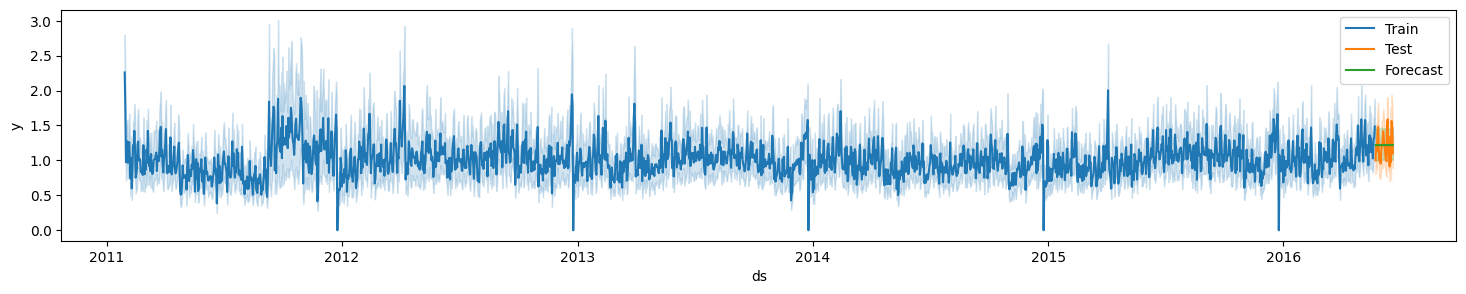

In [ ]:
plt.figure(figsize=(18,3))
sns.lineplot(train, x="ds", y="y", label="Train")
sns.lineplot(test, x="ds", y="y_test", label="Test")
sns.lineplot(forecast_df, x="ds", y="AutoETS", label="Forecast",)
plt.show()

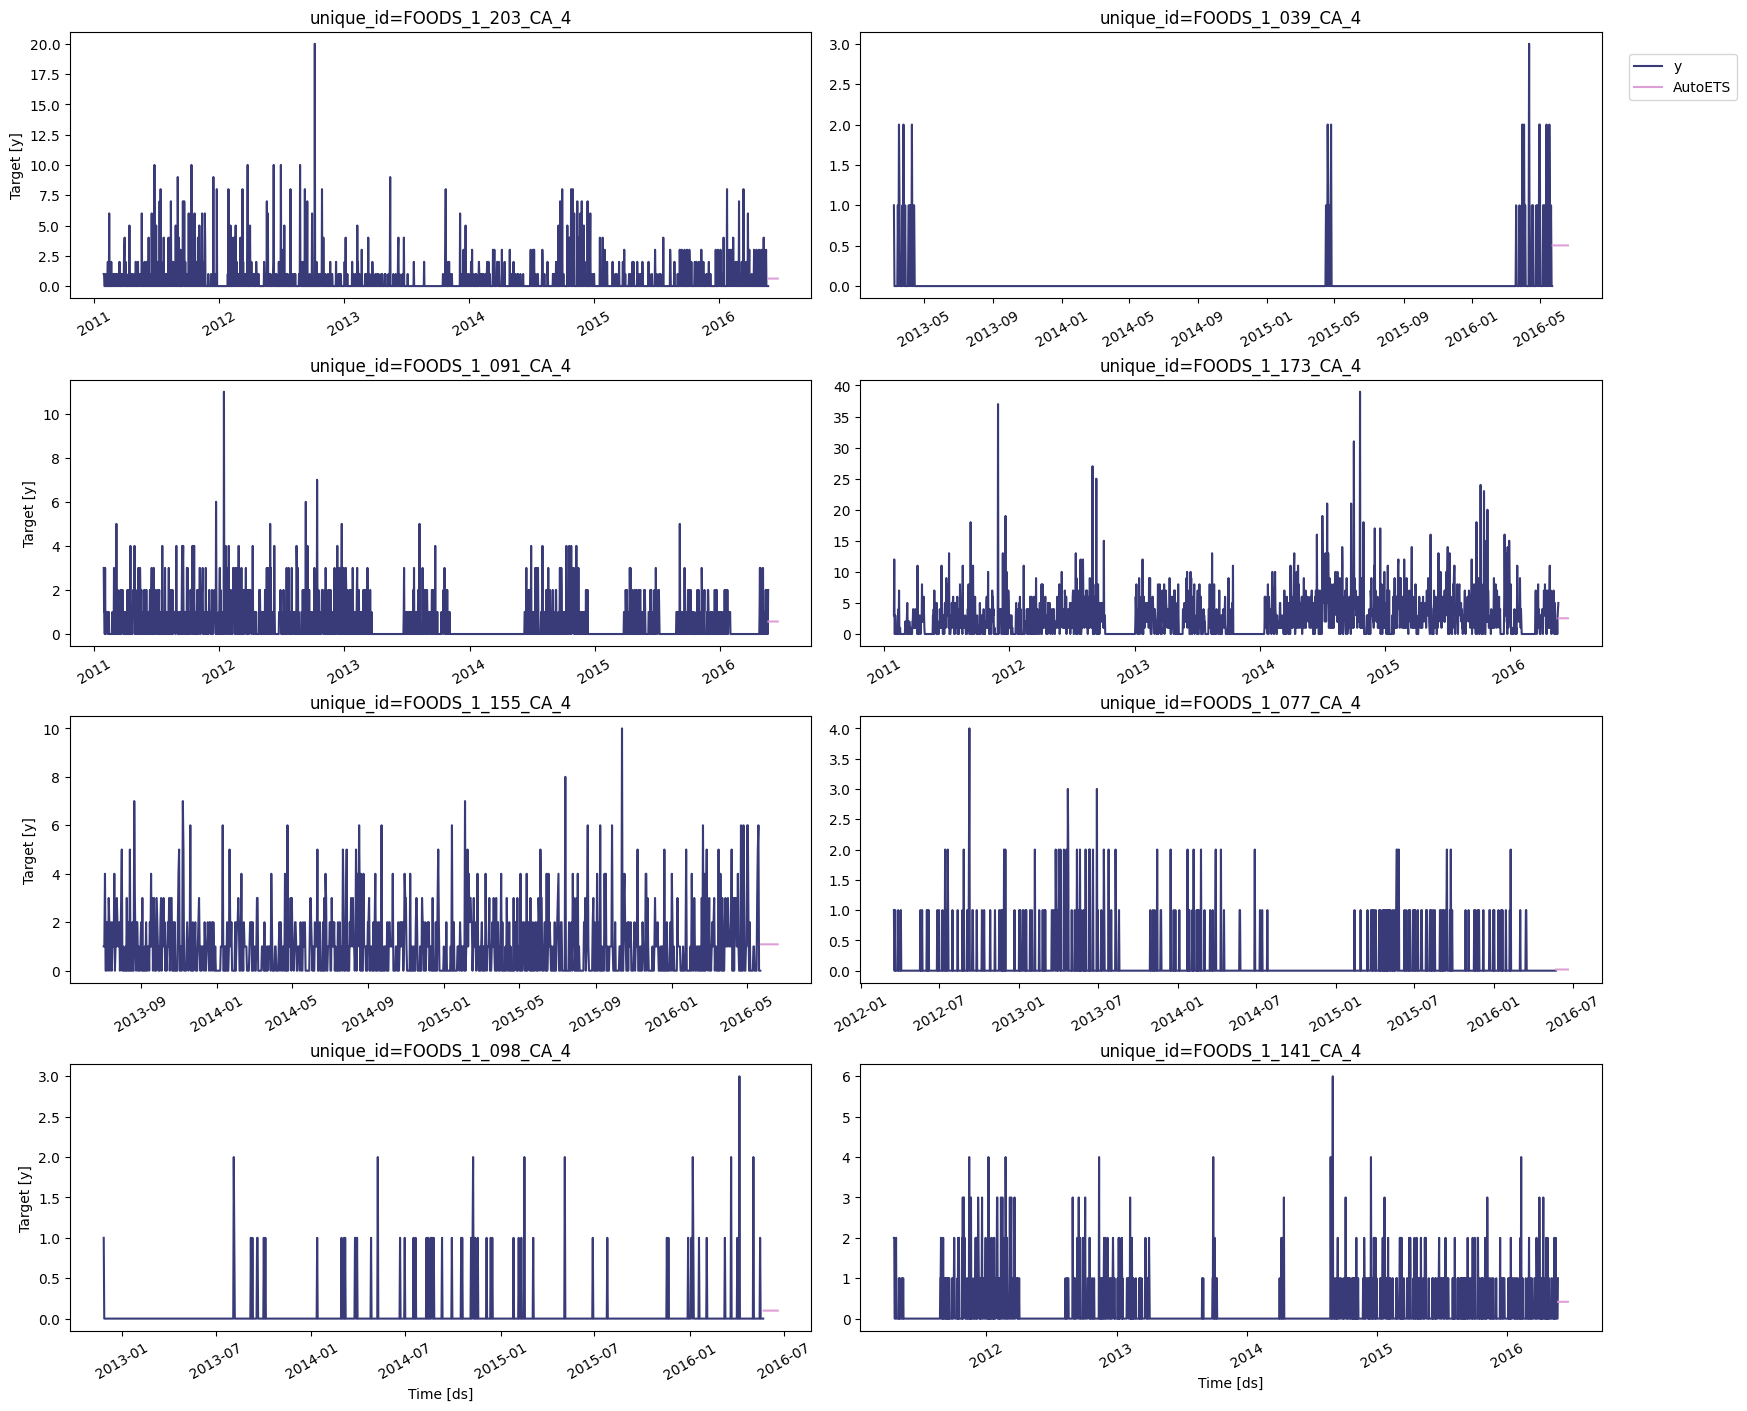

In [ ]:
sf.plot(train, forecast_df)

In [ ]:
cv_ets = sf.cross_validation(df=train,
                                 h=horizon,
                                 n_windows=1,
                                 step_size=horizon)

cv_ets

,unique_id,ds,cutoff,y,AutoETS
0,FOODS_1_001_CA_4,2016-04-25,2016-04-24,0.0,0.330402
1,FOODS_1_001_CA_4,2016-04-26,2016-04-24,1.0,0.330402
2,FOODS_1_001_CA_4,2016-04-27,2016-04-24,0.0,0.330402
3,FOODS_1_001_CA_4,2016-04-28,2016-04-24,0.0,0.330402
4,FOODS_1_001_CA_4,2016-04-29,2016-04-24,0.0,0.330402
...,...,...,...,...,...
6043,FOODS_1_219_CA_4,2016-05-18,2016-04-24,3.0,1.413103
6044,FOODS_1_219_CA_4,2016-05-19,2016-04-24,2.0,1.413103
6045,FOODS_1_219_CA_4,2016-05-20,2016-04-24,2.0,1.413103
6046,FOODS_1_219_CA_4,2016-05-21,2016-04-24,6.0,1.413103


## **5. ANÁLISE DAS MÉTRICAS**

In [ ]:
def rmsse(y, y_hat, y_train, seasonality):
    delta_y = (y - y_hat) ** 2
    delta_y = np.average(delta_y)
    scale = (y_train[:-seasonality] - y_train[seasonality:]) ** 2
    scale = np.average(scale)
    rmsse = np.sqrt(delta_y / scale)
    return rmsse

def mase(y, y_hat, y_train, seasonality):
    delta_y = abs(y - y_hat)
    delta_y = np.average(delta_y)
    scale = abs(y_train[:-seasonality] - y_train[seasonality:])
    scale = np.average(scale)
    mase = delta_y / scale
    return mase

def model_evaluation(y_hist, y_true, y_pred, Model, seasonality):

    results_row = [{"Model": Model,
                    "MSE": metrics.mean_squared_error(y_true, y_pred),
                    "MAE": metrics.mean_absolute_error(y_true, y_pred),
                    "RMSE": np.sqrt(metrics.mean_squared_error(y_true, y_pred)),
                    "RMSSE": rmsse(y_true.values, y_pred.values, y_hist.values, seasonality=seasonality),
                    "MASE": mase(y_true.values, y_pred.values, y_hist.values, seasonality=seasonality)
                   }]

    results = pd.DataFrame.from_records(results_row)
    return results

In [ ]:
### FAZER DOWNLOAD DO FICHEIRO 'results_PST3.csv' NA ABA FICHEIROS DO COLAB ###

new_result = model_evaluation(train["y"], test["y_test"], forecast_df["AutoETS"], "AutoETS", season_length)

Models_results = pd.concat([Models_results, new_result], ignore_index=True)

Models_results.to_csv("results_PST3.csv", index=False)

Models_results

,Model,MSE,MAE,RMSE,RMSSE,MASE
0,Seasonal Naive,4.866237,1.268023,2.205955,1.055169,1.228272
1,Historic Average,3.181790,1.069713,1.783757,0.853221,1.036179
2,AutoARIMA,2.778064,1.043241,1.666753,0.797254,1.010537
3,AutoETS,2.722531,1.036994,1.650009,0.789245,1.004485


O modelo AutoETS obteve os melhores resultados em todas as métricas até ao momento, indicando que foi o modelo que melhor capturou a dinâmica da série temporal.

O AutoARIMA também teve um desempenho bom, ligeiramente inferior ao AutoETS, mas ainda superior aos modelos base.

O modelo Historic Average já melhora substancialmente em relação ao Seasonal Naive. O modelo Seasonal Naive tem o pior desempenho geral.

### Plot das previsões

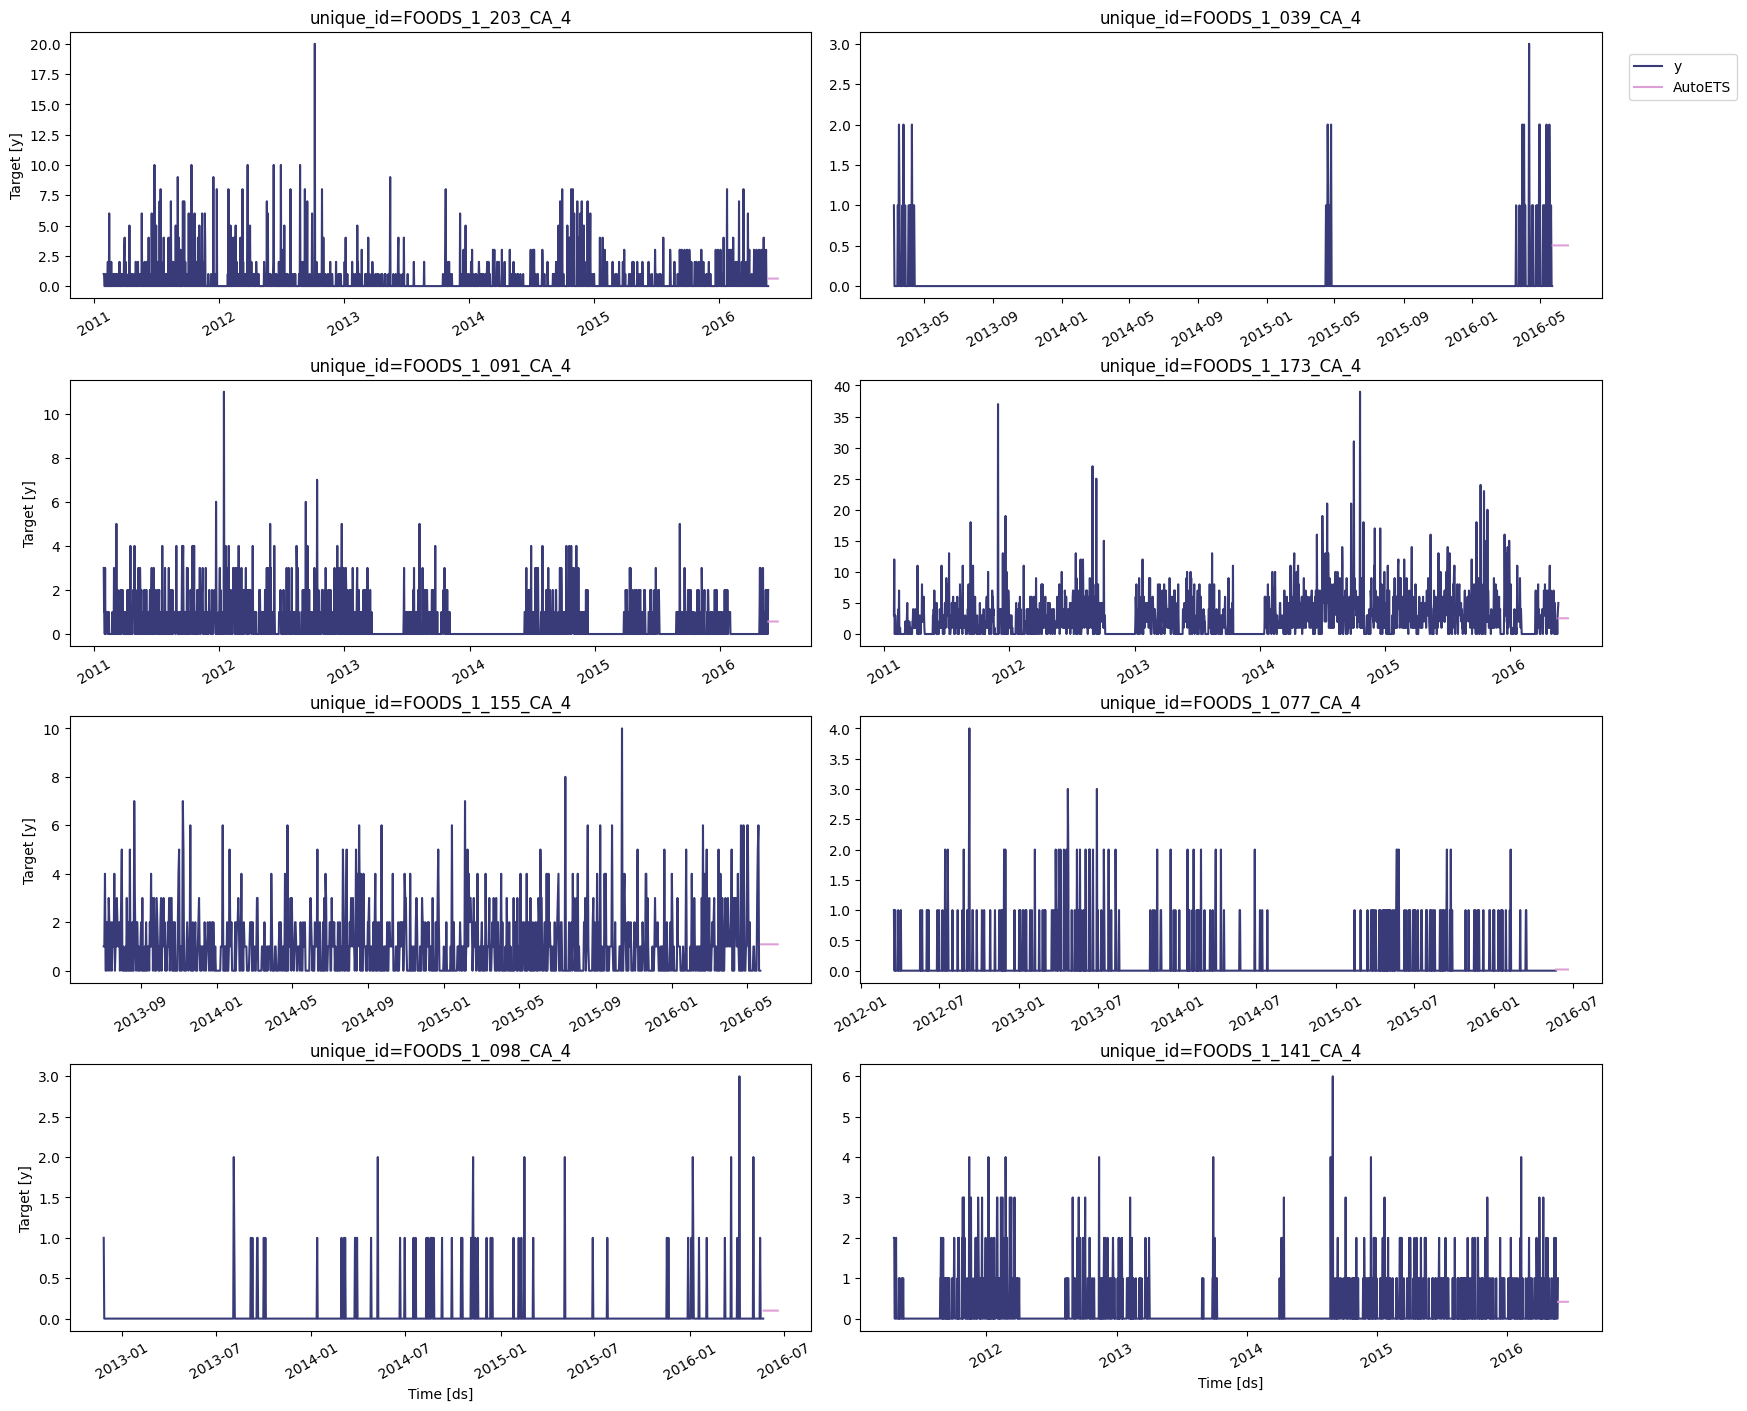

In [ ]:
sf.plot(train, forecast_df, models=['AutoETS'])